In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import chi2_contingency

sns.set(style='darkgrid')

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 311 (delta 16), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (311/311), 302.52 MiB | 12.38 MiB/s, done.
Resolving deltas: 100% (130/130), done.
Updating files: 100% (237/237), done.


In [3]:
df = pd.read_csv('//content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [8]:
#handling missing values in director and cast
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [9]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [10]:
#handling missing values in country
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

In [11]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [12]:
#Dropping date_added and rating since the number is small, it would be safe option
df.dropna(subset=['date_added','rating'], inplace=True)

In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [14]:
#convert date added to date-time format
df['date_added'] = pd.to_datetime(df['date_added'], format= 'mixed',dayfirst=False)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [16]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


Exploratory data Analysis and Visualization

In [17]:
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


In [18]:
df['type'].value_counts().index



Index(['Movie', 'TV Show'], dtype='object', name='type')

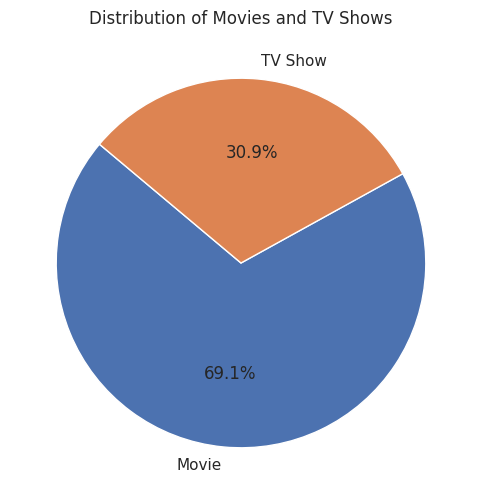

In [19]:
plt.figure(figsize=(10,6))
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies and TV Shows')
plt.show()

#### 4.2 How has content been added over time?

<Figure size 1400x800 with 0 Axes>

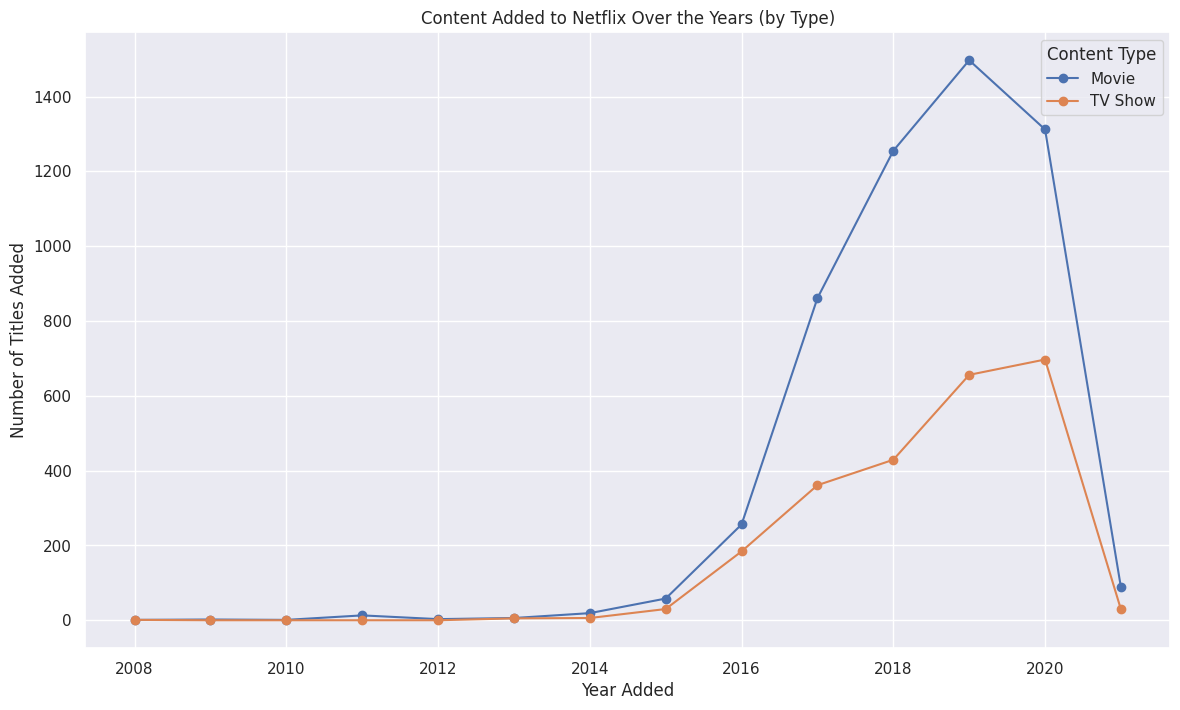

In [20]:
# Group data by year and content type
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plot the data

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [21]:
# Split the 'listed_in' column and explode it

# Split the 'listed_in' column and explode it
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

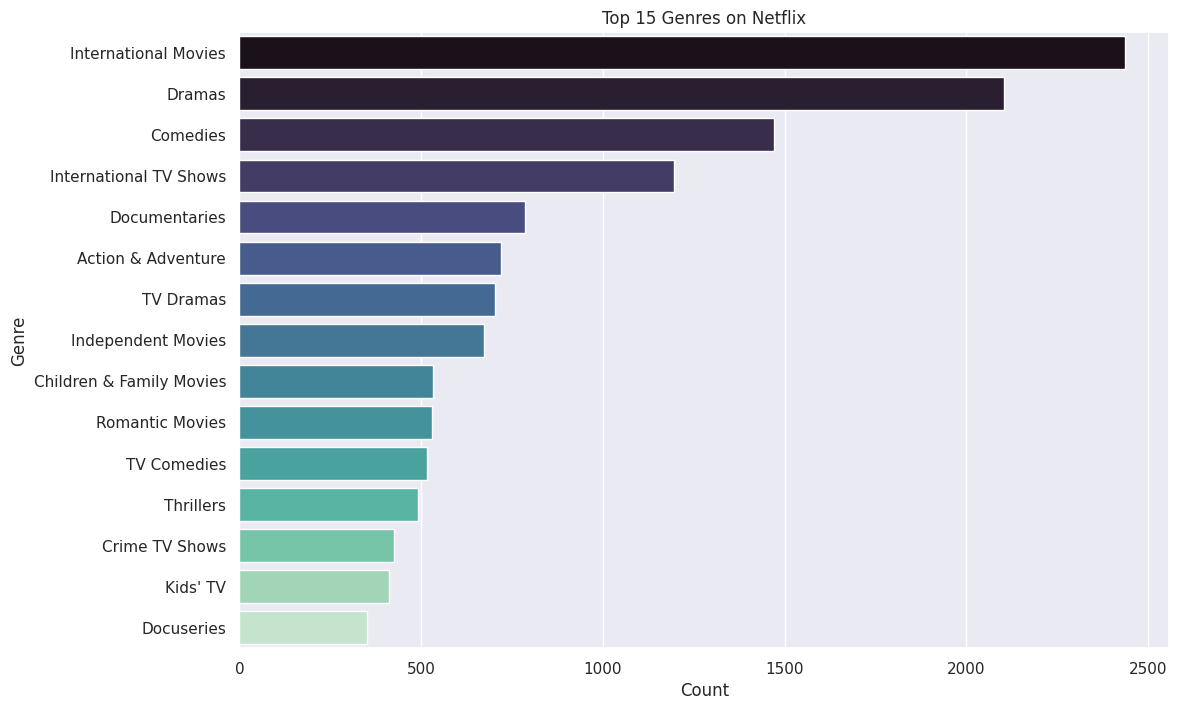

In [22]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [23]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [24]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

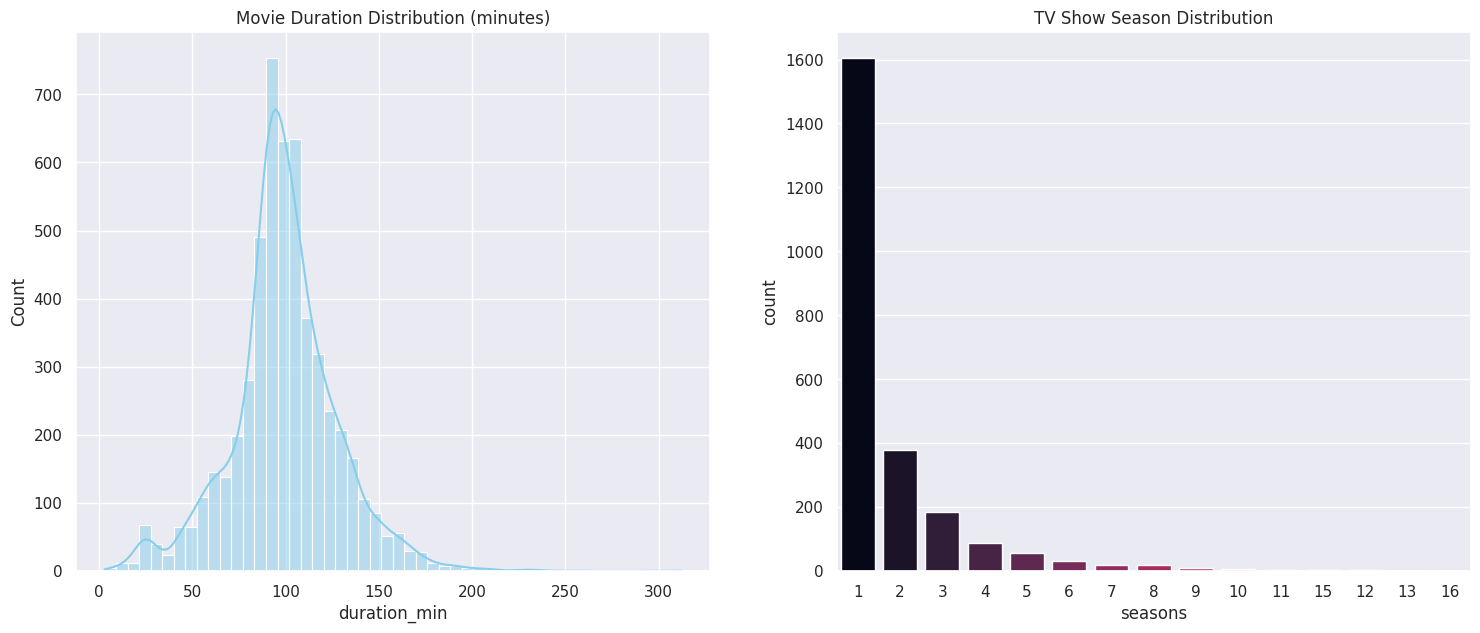

In [25]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

#### 4.5 Where does the content come from? (Geographical Analysis)

In [26]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [27]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

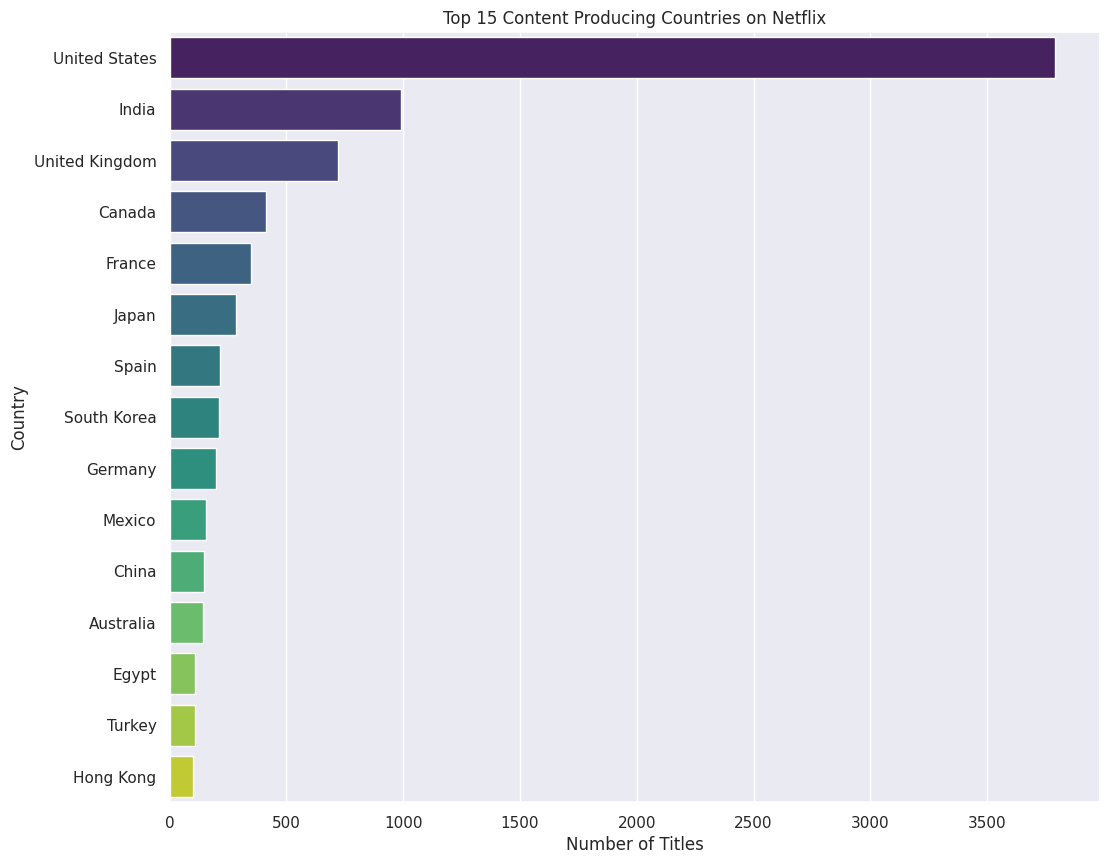

In [28]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

#### 4.6 What are the maturity ratings of the content?

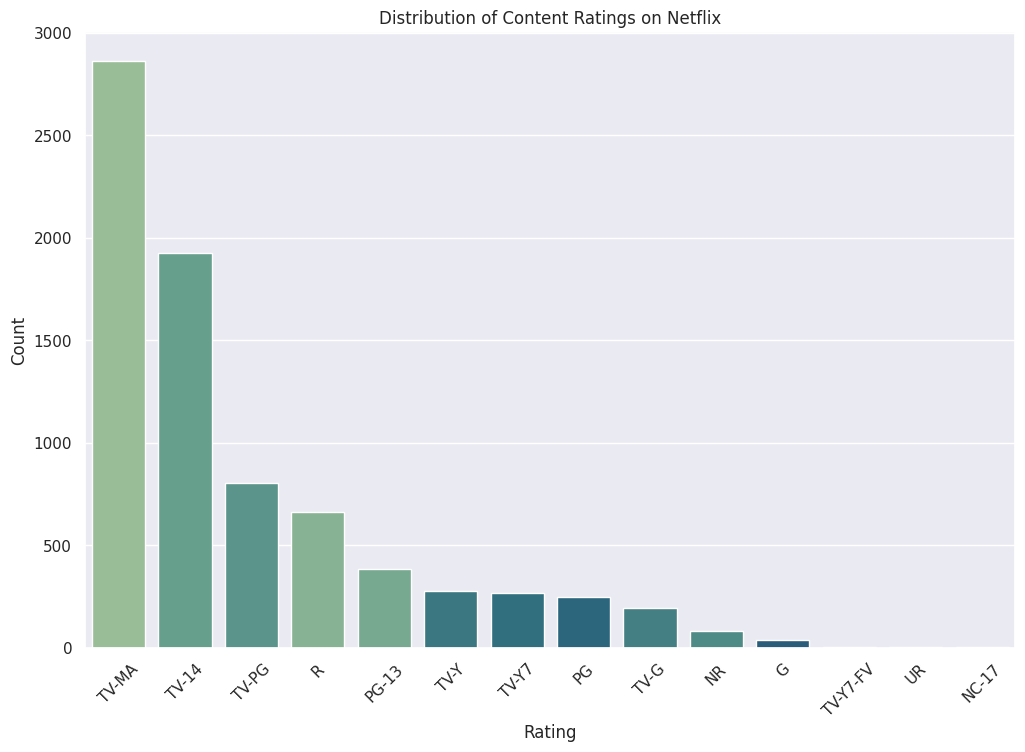

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

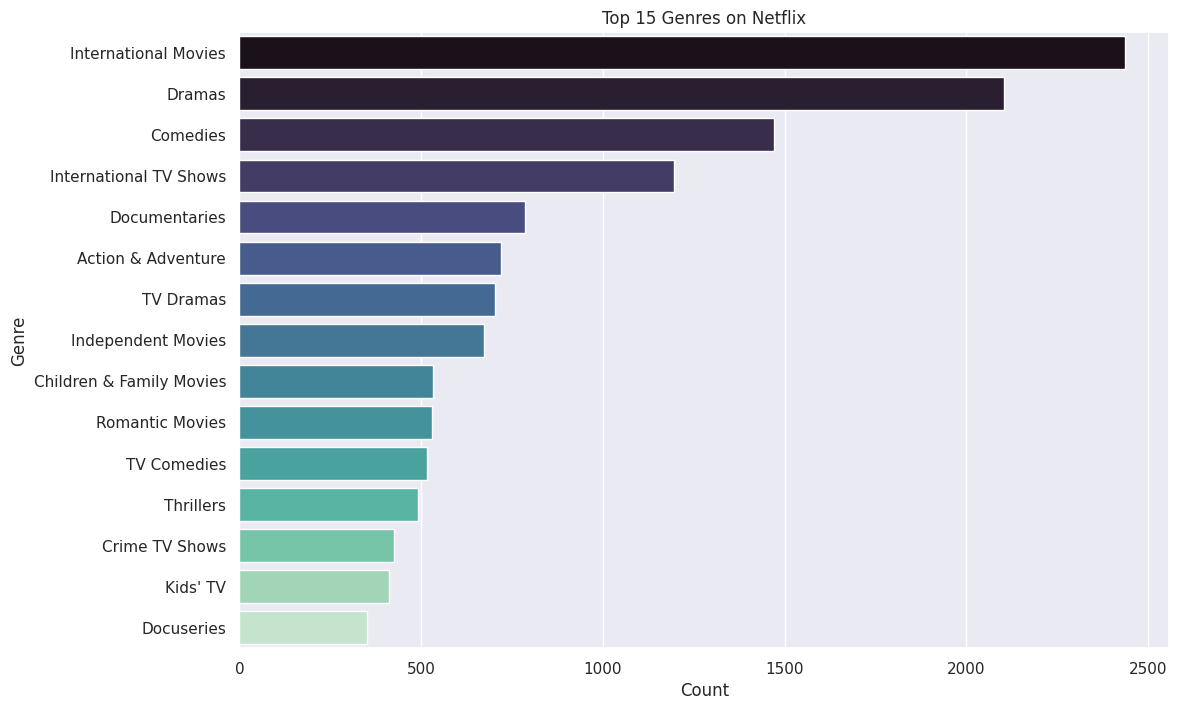

In [30]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

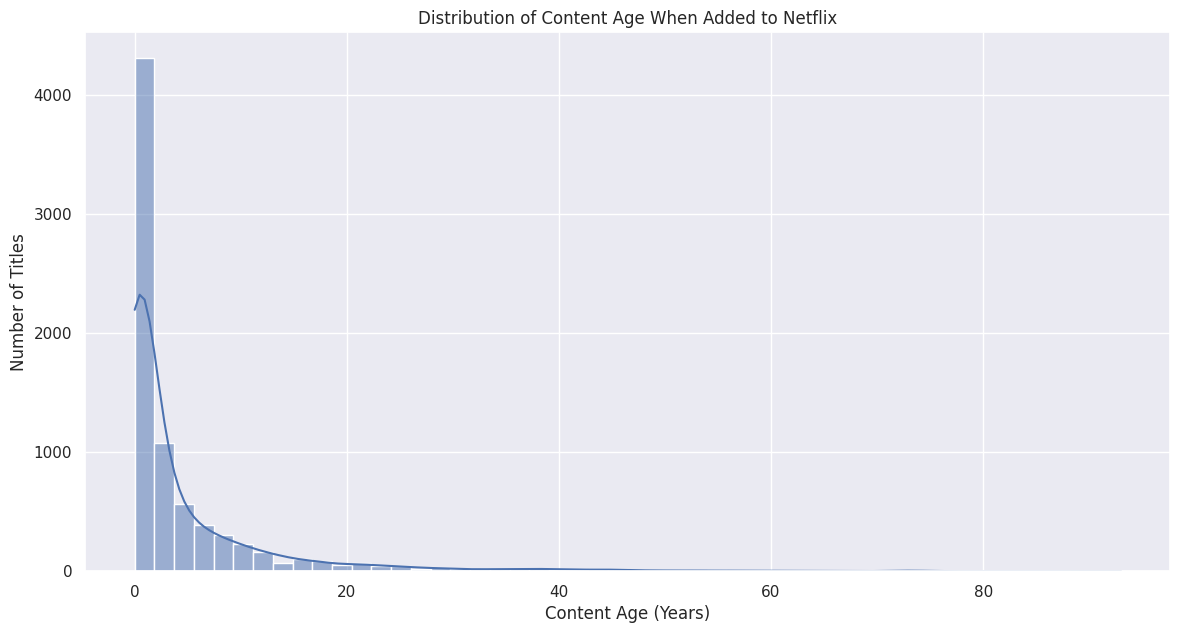

In [31]:
# Create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

### Step 6: Deeper Multivariate Analysis

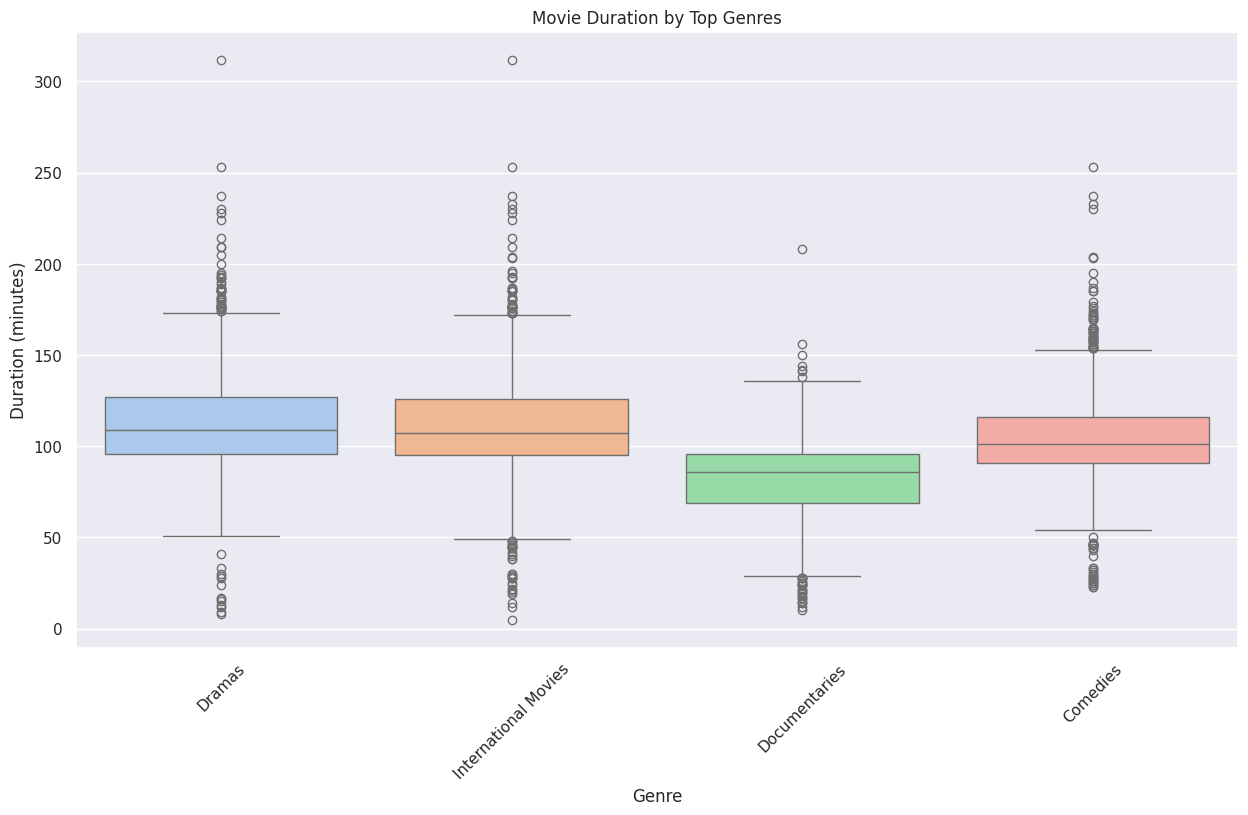

In [32]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

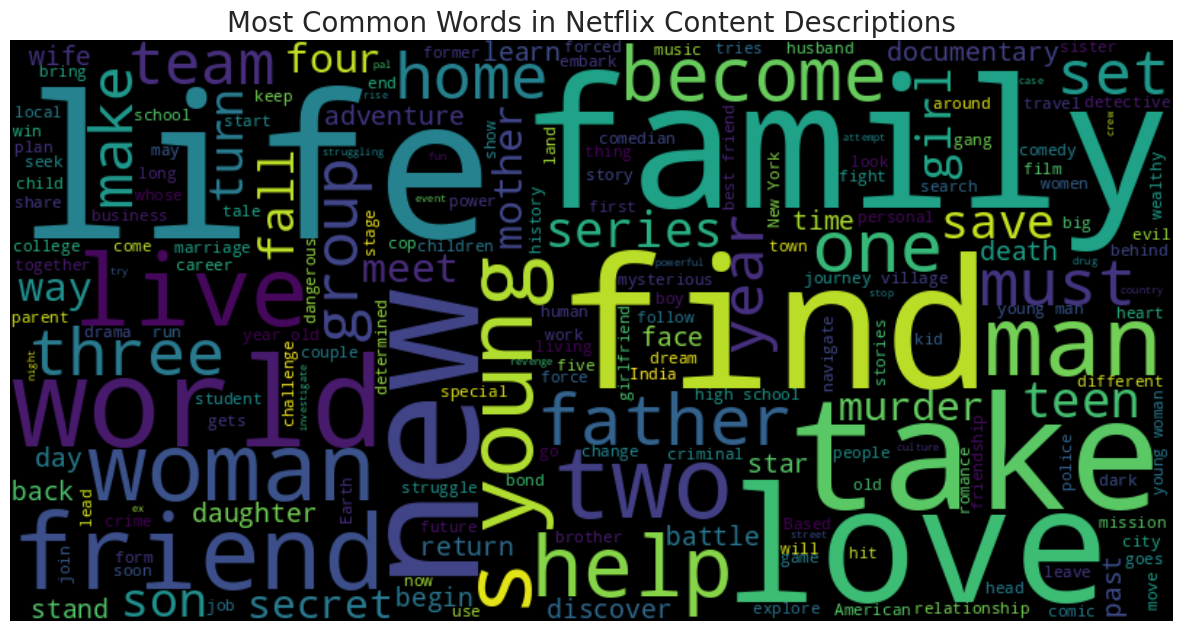

In [33]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

# Submission Q's

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

**Assignment : How has the distribution of content ratings changed over time?**

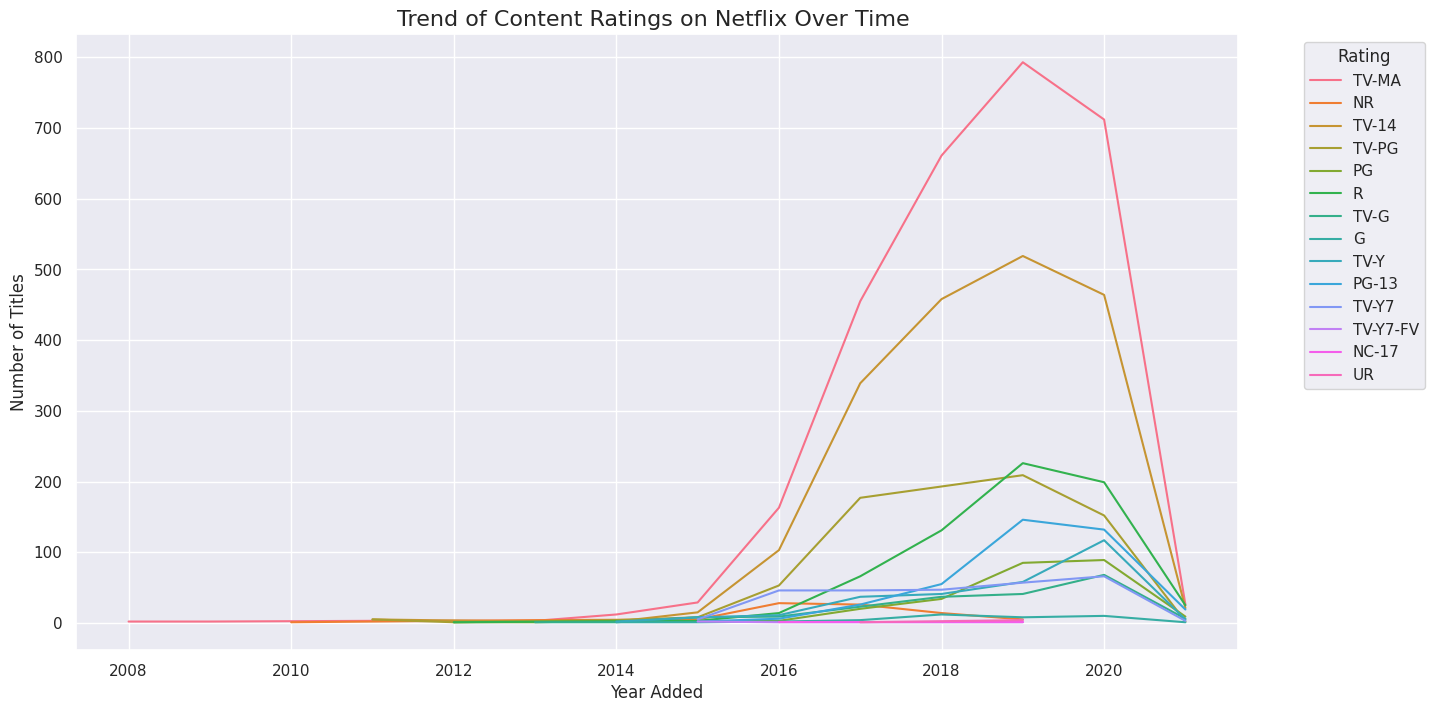

In [34]:
df_plot = df.groupby(['year_added', 'rating']).size().reset_index(name='count')

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_plot, x='year_added', y='count', hue='rating')
plt.title('Trend of Content Ratings on Netflix Over Time ', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

  **Assignment : What are the most common word pairs or phrases in content descriptions?**

In [35]:
#common word pairs or phrases in content descriptions
#1. # Combine all descriptions into a single string
description_text = ' '.join(df['description'])
description_text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

In [36]:
#common word pairs or phrases in description
from nltk import ngrams
from nltk.corpus import reuters
from collections import defaultdict
import re
from collections import Counter


# Preprocess the text
description_text = description_text.lower()
description_text = re.sub(r'[^\w\s]', '', description_text)
words = description_text.split()
words


['in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 '3',
 'saved',
 'from',
 'squalor',
 'after',
 'a',
 'devastating',
 'earthquake',
 'hits',
 'mexico',
 'city',
 'trapped',
 'survivors',
 'from',
 'all',
 'walks',
 'of',
 'life',
 'wait',
 'to',
 'be',
 'rescued',
 'while',
 'trying',
 'desperately',
 'to',
 'stay',
 'alive',
 'when',
 'an',
 'army',
 'recruit',
 'is',
 'found',
 'dead',
 'his',
 'fellow',
 'soldiers',
 'are',
 'forced',
 'to',
 'confront',
 'a',
 'terrifying',
 'secret',
 'thats',
 'haunting',
 'their',
 'jungle',
 'island',
 'training',
 'camp',
 'in',
 'a',
 'postapocalyptic',
 'world',
 'ragdoll',
 'robots',
 'hide',
 'in',
 'fear',
 'from',
 'dangerous',
 'machines',
 'out',
 'to',
 'exterminate',
 'them',
 'until',
 'a',
 'brave',
 'newcomer',
 'joins',
 'the',
 'group',
 'a',
 'brilliant',
 'group',
 'of',
 'stu

In [37]:
# Generate bigrams (n=2)
n = 2
generated_ngrams = list(ngrams(words, n))
generated_ngrams


[('in', 'a'),
 ('a', 'future'),
 ('future', 'where'),
 ('where', 'the'),
 ('the', 'elite'),
 ('elite', 'inhabit'),
 ('inhabit', 'an'),
 ('an', 'island'),
 ('island', 'paradise'),
 ('paradise', 'far'),
 ('far', 'from'),
 ('from', 'the'),
 ('the', 'crowded'),
 ('crowded', 'slums'),
 ('slums', 'you'),
 ('you', 'get'),
 ('get', 'one'),
 ('one', 'chance'),
 ('chance', 'to'),
 ('to', 'join'),
 ('join', 'the'),
 ('the', '3'),
 ('3', 'saved'),
 ('saved', 'from'),
 ('from', 'squalor'),
 ('squalor', 'after'),
 ('after', 'a'),
 ('a', 'devastating'),
 ('devastating', 'earthquake'),
 ('earthquake', 'hits'),
 ('hits', 'mexico'),
 ('mexico', 'city'),
 ('city', 'trapped'),
 ('trapped', 'survivors'),
 ('survivors', 'from'),
 ('from', 'all'),
 ('all', 'walks'),
 ('walks', 'of'),
 ('of', 'life'),
 ('life', 'wait'),
 ('wait', 'to'),
 ('to', 'be'),
 ('be', 'rescued'),
 ('rescued', 'while'),
 ('while', 'trying'),
 ('trying', 'desperately'),
 ('desperately', 'to'),
 ('to', 'stay'),
 ('stay', 'alive'),
 ('ali

In [38]:
# Count n-gram frequencies
ngram_counts = Counter(generated_ngrams)
ngram_counts

Counter({('in', 'a'): 631,
         ('a', 'future'): 9,
         ('future', 'where'): 4,
         ('where', 'the'): 13,
         ('the', 'elite'): 6,
         ('elite', 'inhabit'): 1,
         ('inhabit', 'an'): 1,
         ('an', 'island'): 9,
         ('island', 'paradise'): 1,
         ('paradise', 'far'): 1,
         ('far', 'from'): 8,
         ('from', 'the'): 184,
         ('the', 'crowded'): 2,
         ('crowded', 'slums'): 1,
         ('slums', 'you'): 1,
         ('you', 'get'): 1,
         ('get', 'one'): 2,
         ('one', 'chance'): 5,
         ('chance', 'to'): 37,
         ('to', 'join'): 20,
         ('join', 'the'): 13,
         ('the', '3'): 1,
         ('3', 'saved'): 1,
         ('saved', 'from'): 3,
         ('from', 'squalor'): 1,
         ('squalor', 'after'): 1,
         ('after', 'a'): 184,
         ('a', 'devastating'): 10,
         ('devastating', 'earthquake'): 1,
         ('earthquake', 'hits'): 3,
         ('hits', 'mexico'): 1,
         ('mexico', 'city

In [39]:
# 5 most common bigrams
common_bigrams = ngram_counts.most_common(5)
print("most common bigrams:")
common_bigrams

most common bigrams:


[(('in', 'a'), 631),
 (('in', 'this'), 613),
 (('in', 'the'), 602),
 (('of', 'the'), 582),
 (('of', 'a'), 495)]

In [40]:
# Generate trigrams (n=3)
n = 3
generated_ngrams_3 = list(ngrams(words, n))
ngram_counts_3 = Counter(generated_ngrams_3)
common_trigrams = ngram_counts_3.most_common(5)
print("most common trigrams:")
common_trigrams

most common trigrams:


[(('a', 'group', 'of'), 141),
 (('a', 'young', 'man'), 79),
 (('a', 'series', 'of'), 75),
 (('sets', 'out', 'to'), 62),
 (('a', 'young', 'woman'), 61)]

**Assignment : Who are the top directors on Netflix**

In [41]:
df['director'].head()

,director
0,Unknown
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic


In [42]:
df['director'].tail()

,director
7782,Josef Fares
7783,Mozez Singh
7784,Unknown
7785,Unknown
7786,Sam Dunn


In [43]:

import plotly.express as px

filtered_directors=df['director'].str.split(',',expand=True).stack()
#df['director'].value_counts()
#filtered_directors
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
#df.head()
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='Unknown']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
#directorsTop5
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
#directorsTop5
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

**Assignment : Is there a relationship between content age and its type (Movie vs. TV Show)?**

In [47]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


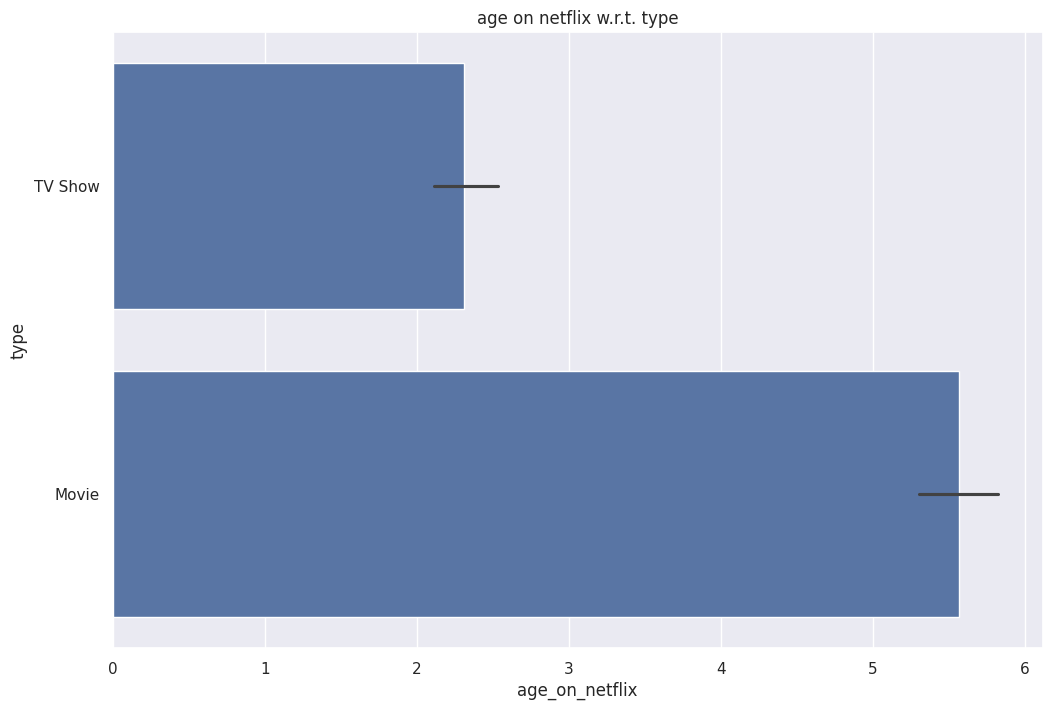

In [67]:


# Plot the data
'''
content_age_type = df.groupby(['age_on_netflix', 'type']).size().unstack().fillna(0)
content_age_type.head()
plt.figure(figsize=(14, 8))
content_age_type.plot(kind='bar', marker='o', figsize=(14, 8))
plt.title('age on netflix w.r.t. type')
plt.xlabel('age_on_netflix')
plt.ylabel('type')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

'''
#Analyzing Relationship
#contigency table
contigency = pd.crosstab(df['age_on_netflix'],df['type'])
#contigency

#chi-square test
chi2, p, dof, expected = chi2_contingency(contigency)
#print('chi-square statistic:', chi2)
#print('p-value:', p)

#Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(y='type', x='age_on_netflix', data=df)
#sns.countplot(data=df, x= "age_on_netflix", hue='type')
plt.title('age on netflix w.r.t. type')
plt.xlabel('age_on_netflix')
plt.ylabel('type')
plt.show()

**Can we identify any trends in content production based on the release year vs. the year added to Netflix?**

In [68]:
#lag calculation
trend = df.groupby("year_added")["age_on_netflix"].mean().reset_index()
trend.head()

,year_added,age_on_netflix
0,2008,1.500000
1,2009,1.000000
2,2010,23.000000
3,2011,19.923077
4,2012,1.000000


In [70]:
#checking content production vs year added trend
release_trend = df.groupby('release_year').size().reset_index(name ="released_count")
release_trend.head()

,release_year,released_count
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,3


In [72]:
added_trend = df.groupby('year_added').size().reset_index(name ="added_count")
added_trend.head()

,year_added,added_count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3


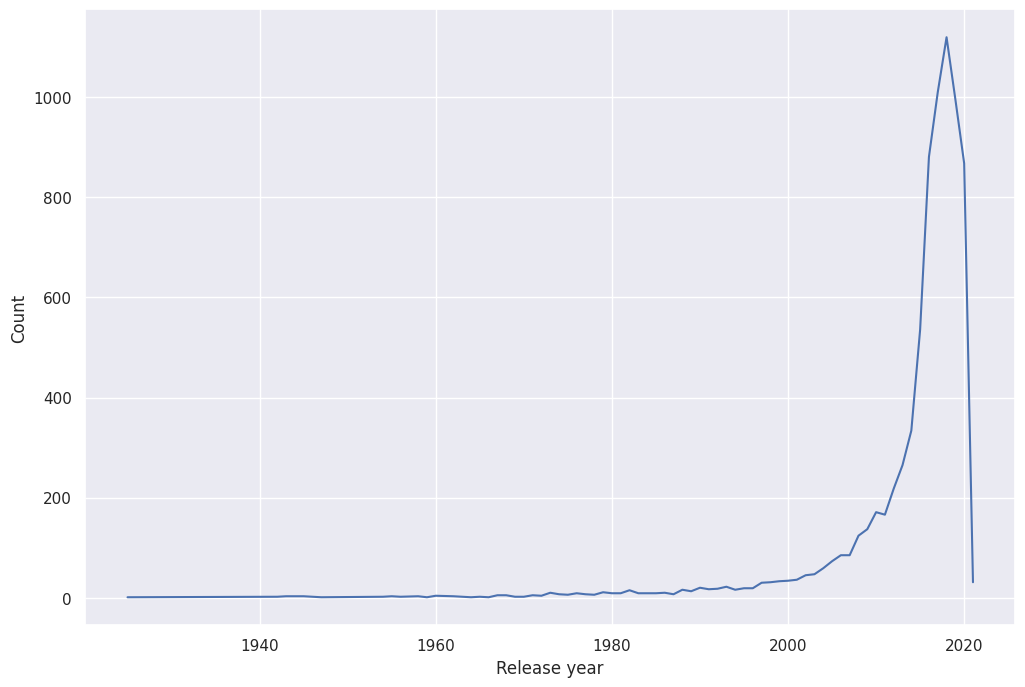

In [75]:
#plotting w.r.t. release year
plt.figure(figsize=(12, 8))
plt.plot(release_trend["release_year"], release_trend["released_count"])
plt.xlabel("Release year")
plt.ylabel("Count")
plt.show()

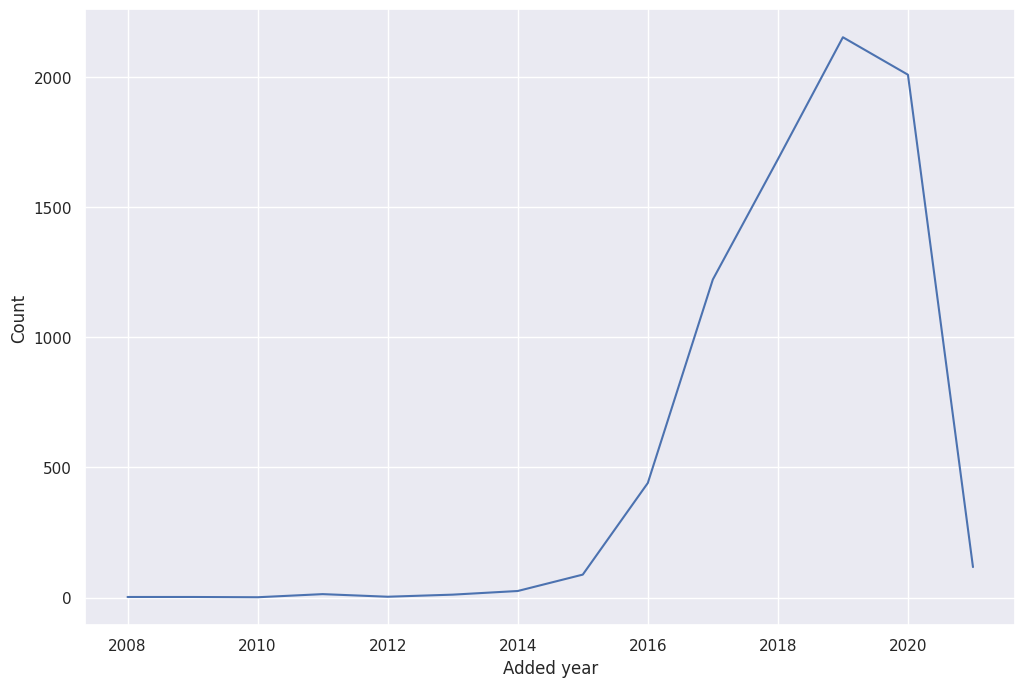

In [81]:
#plotting w.r.t. year added
plt.figure(figsize=(12, 8))
plt.plot(added_trend["year_added"], added_trend["added_count"])
plt.xlabel("Added year")
plt.ylabel("Count")
plt.show()

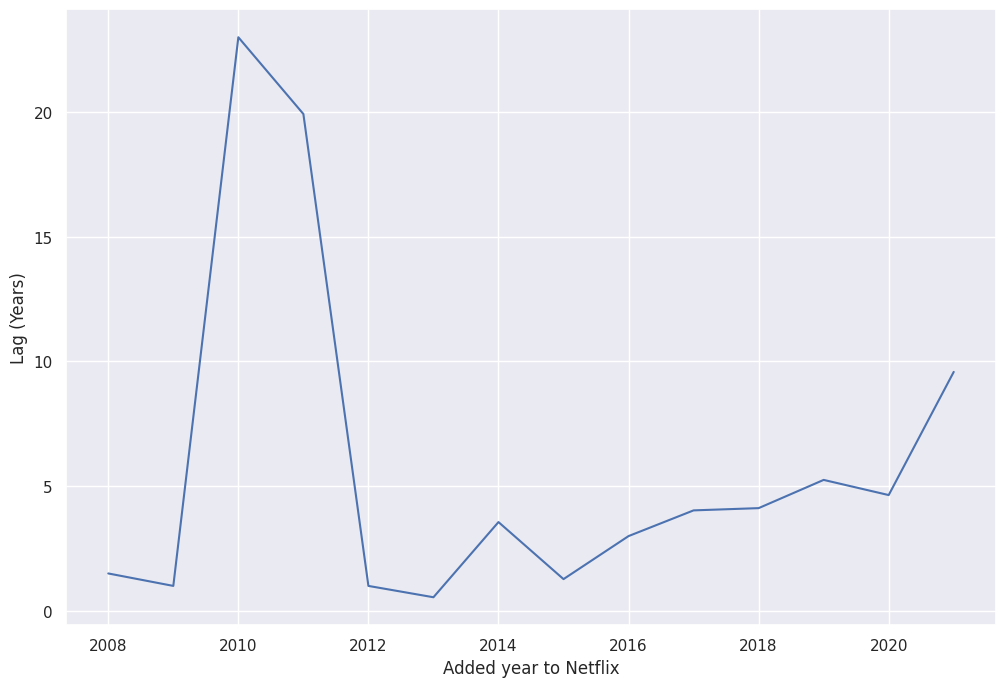

In [83]:
#average lag b/w release and addition
plt.figure(figsize=(12, 8))
plt.plot(trend["year_added"], trend["age_on_netflix"])
plt.xlabel("Added year to Netflix")
plt.ylabel("Lag (Years)")
plt.show()
